In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv("/content/project data.csv")
data.dtypes
data = data.set_index(['Date'])
vol = data['Vol.']
a=vol[0].strip().split()
data['Vol.'] = data['Vol.'].fillna(0.0)

In [0]:
for i in range(data['Vol.'].shape[0]):
    #print(data['Vol.'][i])
    if type(data['Vol.'][i]) != float and data['Vol.'][i].endswith('M'):
        data['Vol.'][i] = data['Vol.'][i][:-1]
        #print(data['Vol.'][i])
    else:
        data['Vol.'][i] = data['Vol.'][i]
        #print(data['Vol.'][i])

In [0]:
for i in range(data['Change %'].shape[0]):
    #print(data['Vol.'][i])
    if type(data['Change %'][i]) != float and data['Change %'][i].endswith('%'):
        data['Change %'][i] = data['Change %'][i][:-1]
        #print(data['Vol.'][i])
    else:
        data['Change %'][i] = data['Change %'][i]
        #print(data['Vol.'][i])

In [0]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [19]:
data.shape, X.shape, y.shape

((265, 6), (265, 5), (265,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
y_pred=rf.predict(X)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_pred, y)

0.5481250264150943

In [23]:
r2_score(y_pred, y)

0.8109458563851994

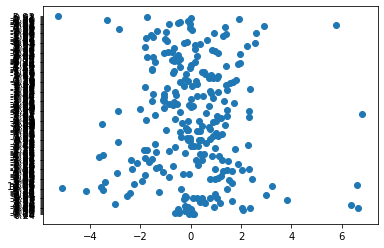

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y)
plt.show()

In [0]:
#Implementing the Random Forest Algorithm on SBI stock market data. 
#The module is not perfect as still the mean square is not close to zero so we should use any other algorithm.